# Project Overvie Financial Analysis of Property-Casualty Insurers in Iowa (2019)


This project explores the financial landscape of property-casualty insurance companies licensed to operate in the state of Iowa. The dataset provides detailed figures on premiums written, losses paid, and taxes paid by company, year, and line of insurance. All data is sourced from official annual statements, although reported tax figures may not reflect amounts actually collected by the state.

Our goal is to evaluate and compare insurer performance based on key financial indicators and to identify patterns that could inform strategic decision-making or regulatory insights.


# Business Question

Which insurance lines and companies in the state of Iowa achieved a profitable loss-to-premium ratio, made significant tax contributions, and demonstrated above-average market shares in 2019, and how can these companies be grouped into distinct clusters based on their financial performance?

# Data Source

The dataset is provided by the Iowa Insurance Division and includes:

Premiums Written: Total value of policies underwritten by each company

Losses Paid: Total claims paid out

Taxes Paid: Reported taxes related to insurance operations

Line of Insurance: Type/category of insurance product

Company Name and Reporting Year

# Notebook Structure
1. Setup and Preparation

2. Overview

3. Data Cleaning

4. Data Transformation

5. Data Visualiation

6. Cluster

7. Classification

8. Conclusion and Insights


# 1.Setup and Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.ticker as mtick
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier

In this first step, we import all the libraries that we need throughout the notebook.

# Insert Data

In [2]:
url = "https://drive.google.com/uc?export=download&id=1D2QEiv-mIooTXZLJaJxxExKeIItPLvfa"
df = pd.read_csv(url)

Connect our Notebook to Google Drive

# 2.Overview

In [3]:
df.head()

,Year,Iowa Code Chapter,State,Company Name,Line of Insurance,Premiums Written,Losses Paid,Taxes Paid,NAIC Number,Iowa Company Code
0,2019,515.48,WI,1st Auto & Casualty Insurance Company,Fire,0,0,0,44725,2894
1,2019,515.48,WI,1st Auto & Casualty Insurance Company,Allied Lines,0,0,0,44725,2894
2,2019,515.48,WI,1st Auto & Casualty Insurance Company,Multiple Peril Crop,0,0,0,44725,2894
3,2019,515.48,WI,1st Auto & Casualty Insurance Company,Federal Flood,0,0,0,44725,2894
4,2019,515.48,WI,1st Auto & Casualty Insurance Company,Farmowners Multiple Peril,68977,38777,985,44725,2894


Creating an Overview of the Table for a better understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39861 entries, 0 to 39860
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               39861 non-null  int64 
 1   Iowa Code Chapter  39775 non-null  object
 2   State              39861 non-null  object
 3   Company Name       39861 non-null  object
 4   Line of Insurance  39861 non-null  object
 5   Premiums Written   39861 non-null  int64 
 6   Losses Paid        39861 non-null  int64 
 7   Taxes Paid         39861 non-null  int64 
 8   NAIC Number        39861 non-null  int64 
 9   Iowa Company Code  39861 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 3.0+ MB


- Checking for missing entries
- Missing Data Found in column 1 (Iowa Code Chapter)

In [5]:
df["Iowa Code Chapter"].isna().sum()

np.int64(86)

- Proofing that Data is missing

# 3.Data Cleaning

In [6]:
df = df.dropna(subset=["Iowa Code Chapter"])

- Removing all the entries without Iowa Code Chapter

In [7]:
df = df[df["Premiums Written"] > 0]

:- Dropping all the values from Premiums Written equal to 0 (keeps only rows with values greater than 0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4029 entries, 4 to 39852
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               4029 non-null   int64 
 1   Iowa Code Chapter  4029 non-null   object
 2   State              4029 non-null   object
 3   Company Name       4029 non-null   object
 4   Line of Insurance  4029 non-null   object
 5   Premiums Written   4029 non-null   int64 
 6   Losses Paid        4029 non-null   int64 
 7   Taxes Paid         4029 non-null   int64 
 8   NAIC Number        4029 non-null   int64 
 9   Iowa Company Code  4029 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 346.2+ KB


- Checking if the entries were removed sucessfully

In [9]:
df.duplicated().sum()

np.int64(0)

- Checking for duplicates
- No duplicates found

In [10]:
df.isna().sum()

,0
Year,0
Iowa Code Chapter,0
State,0
Company Name,0
Line of Insurance,0
Premiums Written,0
Losses Paid,0
Taxes Paid,0
NAIC Number,0
Iowa Company Code,0


- Final Examination
- Checking for NaN´s
- No NaN´s found

# 4.Data Transformation

In [11]:
df = df.rename(columns={
    "Company Name": "company",
    "Premiums Written": "premiums_written",
    "Line of Insurance": "line_of_insurance",
    "Losses Paid": "losses_paid",
    "Taxes Paid": "taxes_paid"
})

- Converting columns for simplicity

In [12]:
company_premiums = df.groupby("company")["premiums_written"].sum().reset_index()

- Sum of companys premiums written
- To examine the market share in the next steps

In [13]:
df.head(10)

,Year,Iowa Code Chapter,State,company,line_of_insurance,premiums_written,losses_paid,taxes_paid,NAIC Number,Iowa Company Code
4,2019,515.48,WI,1st Auto & Casualty Insurance Company,Farmowners Multiple Peril,68977,38777,985,44725,2894
5,2019,515.48,WI,1st Auto & Casualty Insurance Company,Homeowners Multiple Peril,30721,0,439,44725,2894
25,2019,515.48,WI,1st Auto & Casualty Insurance Company,Other Liability - Occcurence,53356,0,762,44725,2894
30,2019,515.48,WI,1st Auto & Casualty Insurance Company,Other Private Passenger Auto Liability,1564112,838010,22333,44725,2894
32,2019,515.48,WI,1st Auto & Casualty Insurance Company,Other Commerical Auto Liability,90602,7757,1294,44725,2894
33,2019,515.48,WI,1st Auto & Casualty Insurance Company,Private Passenger Physical Damage,1507244,1223499,21521,44725,2894
34,2019,515.48,WI,1st Auto & Casualty Insurance Company,Commercial Auto Physical Damage,45269,118908,646,44725,2894
39,2019,515.48,WI,1st Auto & Casualty Insurance Company,Boiler and Machinery,1833,1092,26,44725,2894
393,2019,515.48,IA,Acadia Insurance Company,Commerical Multiple Peril (Non-liability portion),1341379,1069998,15047,31325,3096
394,2019,515.48,IA,Acadia Insurance Company,Commerical Multiple Peril (Liability portion),1058722,254240,11875,31325,3096


It seems that the indexing of the rows is not correct after we droped missing values and duplicates as well as doing the groupby. So we have to reset the index and check if everything is in correctly labeled rows

In [14]:
df = df.reset_index(drop=True)

In [15]:
df.head(10)

,Year,Iowa Code Chapter,State,company,line_of_insurance,premiums_written,losses_paid,taxes_paid,NAIC Number,Iowa Company Code
0,2019,515.48,WI,1st Auto & Casualty Insurance Company,Farmowners Multiple Peril,68977,38777,985,44725,2894
1,2019,515.48,WI,1st Auto & Casualty Insurance Company,Homeowners Multiple Peril,30721,0,439,44725,2894
2,2019,515.48,WI,1st Auto & Casualty Insurance Company,Other Liability - Occcurence,53356,0,762,44725,2894
3,2019,515.48,WI,1st Auto & Casualty Insurance Company,Other Private Passenger Auto Liability,1564112,838010,22333,44725,2894
4,2019,515.48,WI,1st Auto & Casualty Insurance Company,Other Commerical Auto Liability,90602,7757,1294,44725,2894
5,2019,515.48,WI,1st Auto & Casualty Insurance Company,Private Passenger Physical Damage,1507244,1223499,21521,44725,2894
6,2019,515.48,WI,1st Auto & Casualty Insurance Company,Commercial Auto Physical Damage,45269,118908,646,44725,2894
7,2019,515.48,WI,1st Auto & Casualty Insurance Company,Boiler and Machinery,1833,1092,26,44725,2894
8,2019,515.48,IA,Acadia Insurance Company,Commerical Multiple Peril (Non-liability portion),1341379,1069998,15047,31325,3096
9,2019,515.48,IA,Acadia Insurance Company,Commerical Multiple Peril (Liability portion),1058722,254240,11875,31325,3096


Like this we reset the Index and after printing the first 20 rows again, we can see that the index now starts at 0 and moves up by 1 step.

In [16]:
total_premiums = company_premiums["premiums_written"].sum()
company_premiums["market_share"] = company_premiums["premiums_written"] / total_premiums

- Calculating the market share for each company

In [17]:
top_companies = company_premiums.sort_values(by="market_share", ascending=False).head(10)


 Calculate the average market share

In [18]:
average_market_share = top_companies["market_share"].mean()

- Sorting from the highest to lowest market share

# 5.Data Visualisation

# *Market Share*

We begin our analysis by identifying the top 10 insurance companies in Iowa based on their 2019 market share.


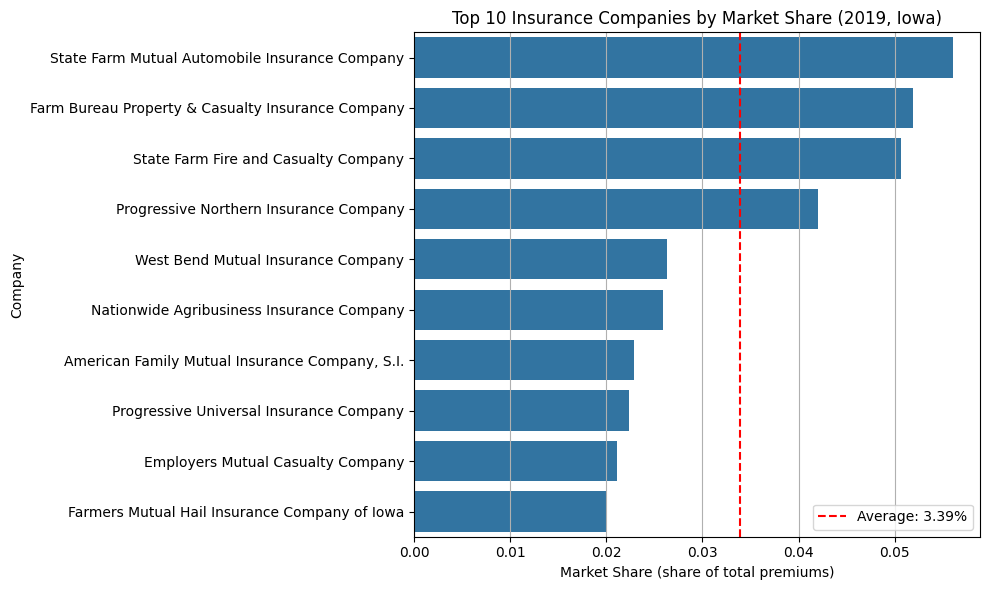

In [19]:
# Create a new figure with defined size
plt.figure(figsize=(10, 6))

# Draw horizontal bar plot showing market share per company
sb.barplot(data=top_companies, y="company", x="market_share")

# Add a vertical line for the average market share
plt.axvline(average_market_share, color="red", linestyle="--", label=f"Average: {average_market_share:.2%}")

# Set the title of the plot
plt.title("Top 10 Insurance Companies by Market Share (2019, Iowa)")

# Label for the x-axis
plt.xlabel("Market Share (share of total premiums)")

# Label for the y-axis
plt.ylabel("Company")

# Add gridlines only along the x-axis
plt.grid(axis="x")

# Show legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

This chart displays the ten insurance companies that held the largest share of total premiums written in Iowa in 2019. Market share is used here as a proxy for business volume and presence in the state’s insurance landscape. The red dashed line marks the average market share across all companies, providing a point of reference to assess relative size.

Several companies, such as State Farm Mutual Automobile Insurance Company
,Farm Bureau Property & Casualty Insurance Company, State Farm Fire and Casualty Company and Progressive Northern Insurance Company, stand out with market shares well above the industry average. While this indicates strong business activity, it does not tell us how efficiently these companies operate. In the next section, we shift our focus to profitability by analyzing loss ratios, allowing us to see which high-volume insurers are also financially effective.



# *Profitability of Companies*

# Companies Most Profitable & Least Profitable

Next, we evaluate the underwriting profitability of the top 10 insurance companies by analyzing their loss ratios.


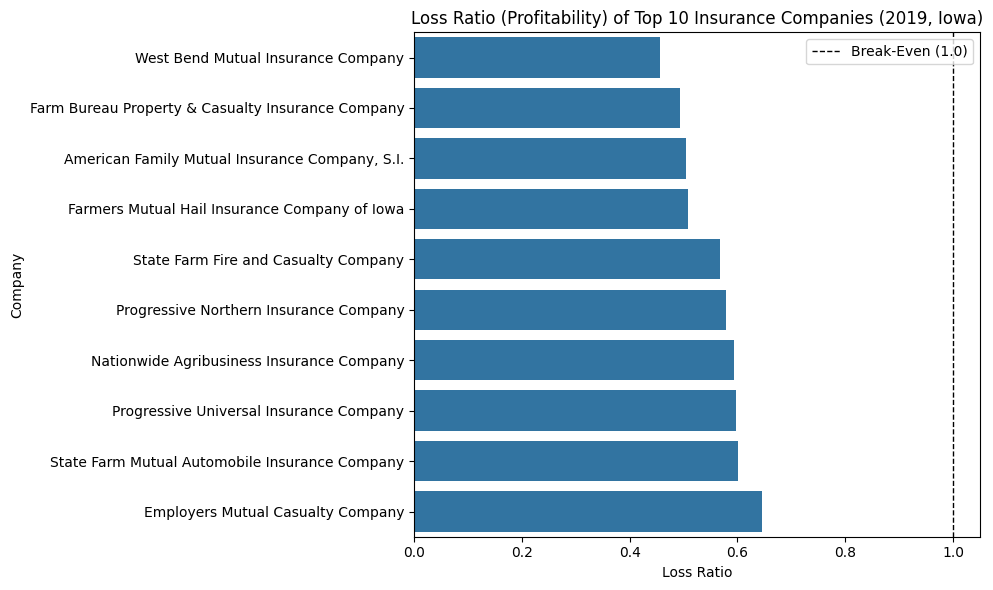

In [20]:
# Aggregation: Sum per company
company_stats = df.groupby("company")[["premiums_written", "losses_paid"]].sum().reset_index()

# Calculating Loss Ratio
company_stats["loss_ratio"] = company_stats["losses_paid"] / company_stats["premiums_written"]

# Top 10 trough Premiums written
top10 = company_stats.sort_values(by="premiums_written", ascending=False).head(10)

# Sort the top 10 companies by loss ratio in descending order
top10_sorted = top10.sort_values(by="loss_ratio")

# Visualization
plt.figure(figsize=(10, 6))
sb.barplot(data=top10_sorted, y="company", x="loss_ratio")
plt.title("Loss Ratio (Profitability) of Top 10 Insurance Companies (2019, Iowa)")
plt.xlabel("Loss Ratio")
plt.ylabel("Company")
plt.axvline(1, color='black', linestyle='--', linewidth=1, label='Break-Even (1.0)')
plt.legend()
plt.tight_layout()
plt.show()

This chart shows the loss ratios of the ten insurance companies with the highest premium volumes in 2019. The loss ratio is calculated as total losses paid divided by total premiums written. A value below 1.0 indicates that the company paid out less in claims than it earned in premiums, suggesting profitable operations.

The vertical dashed line at 1.0 represents the break-even point. Companies to the left of this line reported positive underwriting performance, with the most profitable being:

- West Bend Mutual Insurance Company  
- State Farm Fire and Casualty Company  
- Employers Mutual Casualty Company  

While all companies shown write a high volume of business, only a subset demonstrated strong profitability, revealing differences in risk management and pricing strategies among Iowa’s largest insurers.



To complement our profitability analysis, we now look at the companies with the highest loss ratios in 2019.


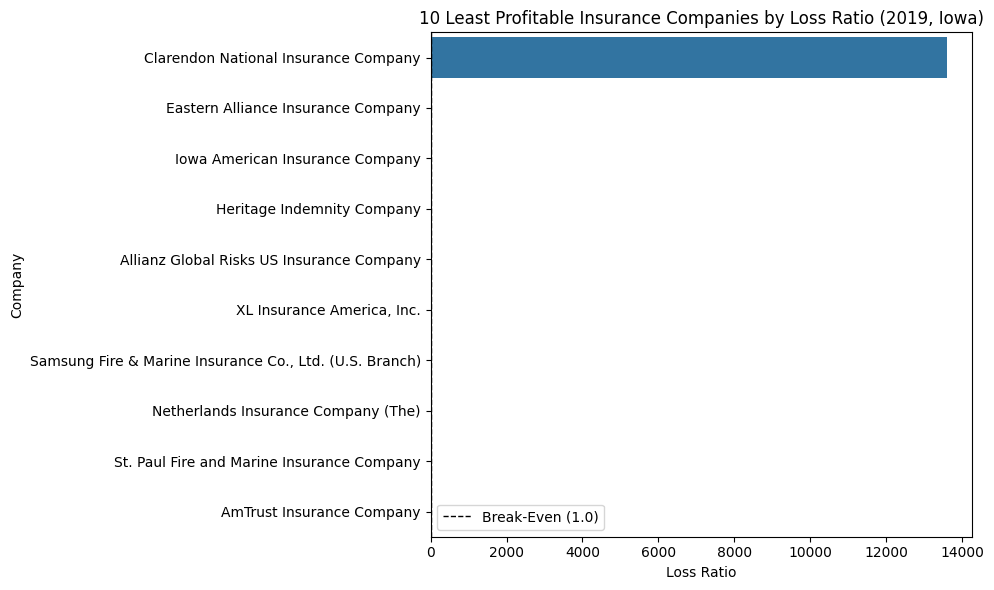

In [21]:
# Step 1: Aggregate totals
company_stats = df.groupby("company")[["premiums_written", "losses_paid"]].sum().reset_index()

# Step 2: Calculate loss ratio
company_stats["loss_ratio"] = company_stats["losses_paid"] / company_stats["premiums_written"]

# Step 3: Filter top 10 companies by highest loss ratio
worst_companies = company_stats.sort_values(by="loss_ratio", ascending=False).head(10)

# Step 4: Plot
plt.figure(figsize=(10, 6))
sb.barplot(data=worst_companies, y="company", x="loss_ratio")
plt.title("10 Least Profitable Insurance Companies by Loss Ratio (2019, Iowa)")
plt.xlabel("Loss Ratio")
plt.ylabel("Company")
plt.axvline(1, color='black', linestyle='--', linewidth=1, label='Break-Even (1.0)')
plt.legend()
plt.tight_layout()
plt.show()

This chart shows the ten insurance companies with the highest loss ratios in 2019, based on the ratio of total losses paid to premiums written. A loss ratio above 1.0 indicates that the company paid out more in claims than it earned in premiums, leading to negative underwriting performance.

The vertical dashed line represents the break-even point. While all companies in this view performed poorly, one insurer—**HDI Global Insurance Company**—stands out as a clear outlier with a loss ratio significantly higher than the others. This extreme result may reflect exceptional claims exposure, pricing errors, or irregular business conditions.

To better understand the rest of the market without this distortion, the following chart presents the least profitable companies excluding this outlier, offering a clearer view of more typical but still underperforming insurers.

After removing the outlier, we take a closer look at the companies with the highest loss ratios among the remaining insurers.


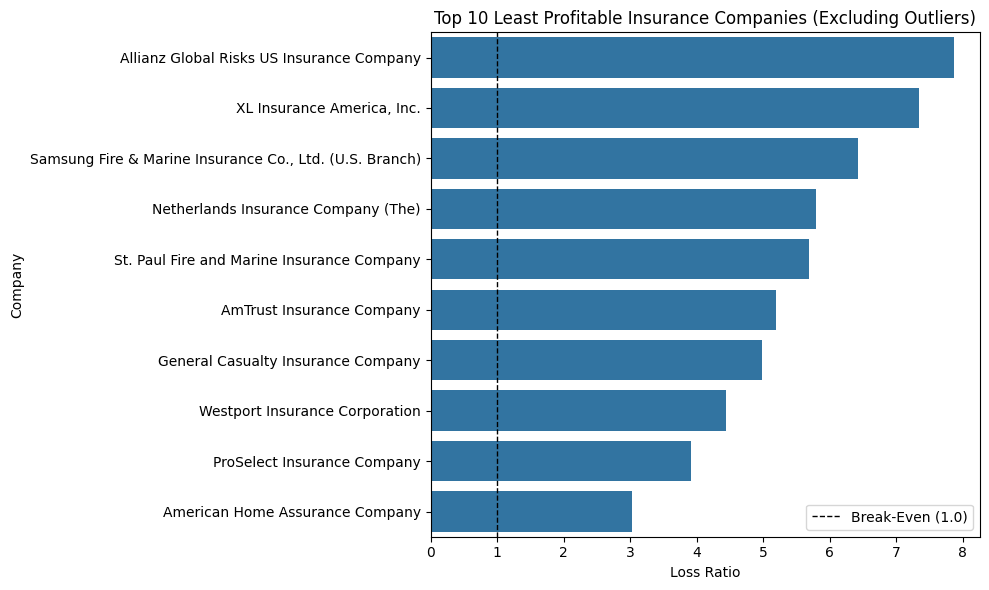

In [22]:
# Step 1: Aggregate totals
company_stats = df.groupby("company")[["premiums_written", "losses_paid"]].sum().reset_index()

# Step 2: Calculate loss ratio
company_stats["loss_ratio"] = company_stats["losses_paid"] / company_stats["premiums_written"]

# Step 3: Exclude outliers (e.g. loss ratio > 10)
filtered_stats = company_stats[company_stats["loss_ratio"] <= 10]

# Step 4: Get top 10 companies by highest loss ratio (after removing outliers)
worst_companies_cleaned = filtered_stats.sort_values(by="loss_ratio", ascending=False).head(10)

# Step 5: Plot
plt.figure(figsize=(10, 6))
sb.barplot(data=worst_companies_cleaned, y="company", x="loss_ratio")
plt.title("Top 10 Least Profitable Insurance Companies (Excluding Outliers)")
plt.xlabel("Loss Ratio")
plt.ylabel("Company")
plt.axvline(1, color='black', linestyle='--', linewidth=1, label='Break-Even (1.0)')
plt.legend()
plt.tight_layout()
plt.show()

This chart displays the ten least profitable insurance companies in 2019 after removing extreme outliers, such as HDI Global Insurance Company. All companies shown here have loss ratios above 1.0, meaning they incurred underwriting losses during the year.

By excluding the most extreme case, this view provides a more balanced comparison across underperforming insurers. The companies with the highest adjusted loss ratios include:

- American Hallmark Insurance Company of Texas  
- Watford Insurance Company  
- Ategrity Specialty Insurance Company  

While less extreme than the previous outlier, these insurers still show signs of financial strain, suggesting challenges in claims management, pricing, or risk exposure. This refined view helps better understand the typical range of negative performance without distortion from single high-impact anomalies.


# Comparison of Companies Premiums vs Losses

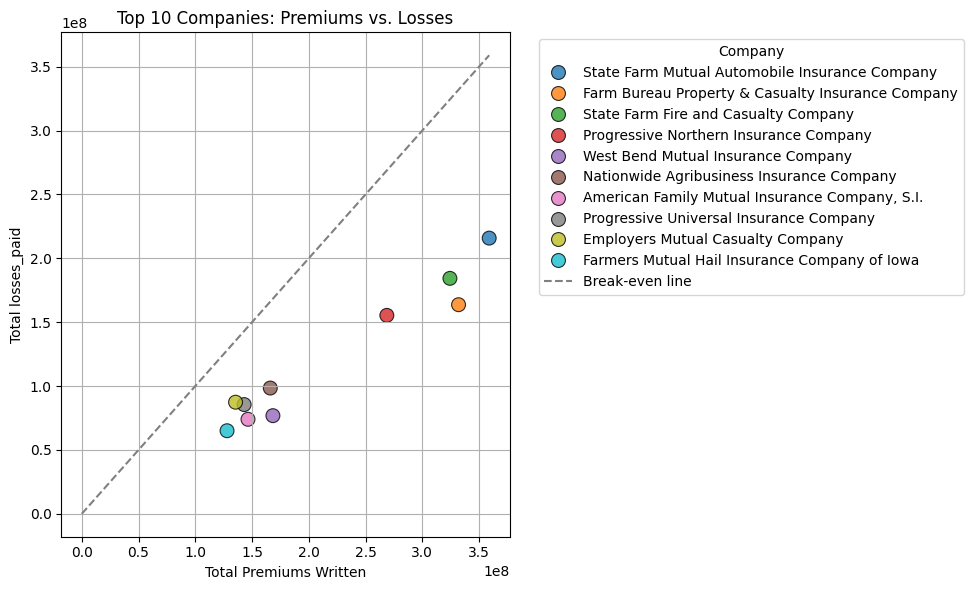

In [23]:
# Aggregate premiums and losses per company
company_totals = df.groupby("company")[["premiums_written", "losses_paid"]].sum().reset_index()

# Top 10 companies by premiums
top10_companies = (
    company_totals.sort_values(by="premiums_written", ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
sb.scatterplot(
    data=top10_companies,
    x="premiums_written",
    y="losses_paid",
    hue="company",
    marker="o",
    s=100,
    alpha=0.8,
    edgecolor="black"
)

# Break-even reference line
max_val = max(top10_companies["premiums_written"].max(), top10_companies["losses_paid"].max())
plt.plot([0, max_val], [0, max_val], linestyle="--", color="gray", label="Break-even line")

# Titles and labels
plt.title("Top 10 Companies: Premiums vs. Losses")
plt.xlabel("Total Premiums Written")
plt.ylabel("Total losses_paid")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation for Decision-Makers**

This chart helps identify risk management performance across companies. Investors or regulators could use this insight to:

Benchmark profitability,

Assess market stability, and

Identify companies at risk of financial stress from high loss ratios.



This scatter plot compares the total premiums written (horizontal axis) to the total losses paid (vertical axis) by the top 10 insurance companies. Each point represents one company.

The dashed diagonal line serves as a break-even indicator, where losses equal premiums. Points below this line indicate profitable operations (lower losses relative to premiums), while points above it show unprofitable outcomes (higher losses than premiums earned).



From the scatter plot, we can see that all of the top 10 insurance companies in Iowa were operating below the break-even line in 2019, meaning they collected more in premiums than they paid out in losses, which indicates strong profitability.

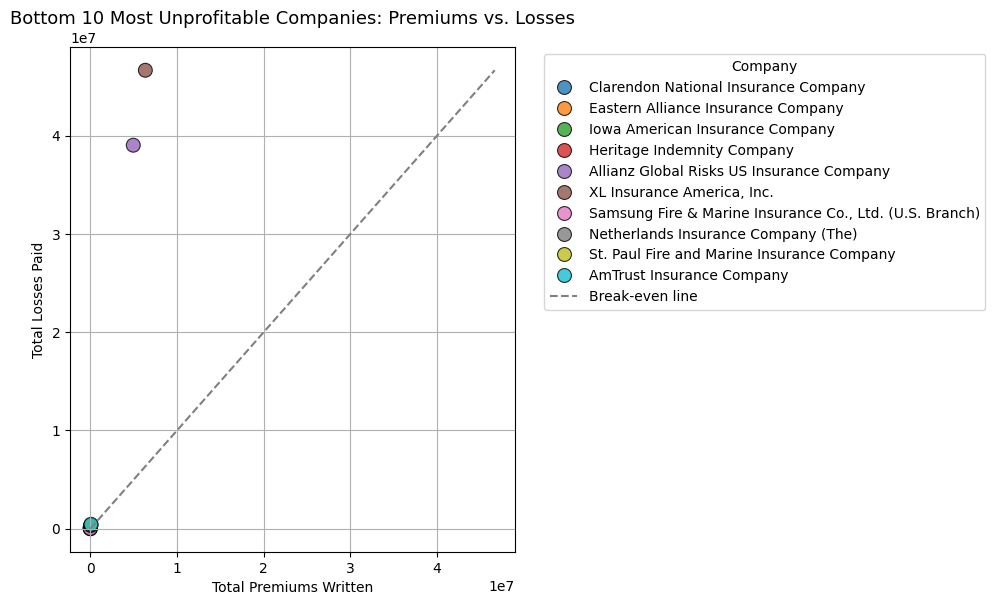

In [24]:
# Aggregate total premiums and losses per company
company_totals = df.groupby("company")[["premiums_written", "losses_paid"]].sum().reset_index()

# Filter out companies with zero premiums to avoid division by zero
company_totals = company_totals[company_totals["premiums_written"] > 0]

# Calculate Loss Ratio
company_totals["loss_ratio"] = company_totals["losses_paid"] / company_totals["premiums_written"]

# Select bottom 10 (highest loss ratios)
bottom10_unprofitable = company_totals.sort_values(by="loss_ratio", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sb.scatterplot(
    data=bottom10_unprofitable,
    x="premiums_written",
    y="losses_paid",
    hue="company",
    marker="o",
    s=100,
    alpha=0.8,
    edgecolor="black"
)

# Add break-even line
max_val = max(bottom10_unprofitable["premiums_written"].max(), bottom10_unprofitable["losses_paid"].max())
plt.plot([0, max_val], [0, max_val], linestyle="--", color="gray", label="Break-even line")

# Titles and labels
plt.title("Bottom 10 Most Unprofitable Companies: Premiums vs. Losses", fontsize=13)
plt.xlabel("Total Premiums Written")
plt.ylabel("Total Losses Paid")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation for Decision-Makers**

This visualization supports:

Performance benchmarking: Stakeholders can identify market leaders and underperformers.

Risk analysis: Reveals whether high volume correlates with profitability.

Strategic planning: Companies above the break-even line may need to revisit their underwriting, pricing, or risk models.

This scatter plot compares Total Premiums Written (x-axis) with Total Losses Paid (y-axis) for the top 10 insurance companies operating in Iowa.

Each dot represents a single company, and the dashed diagonal line indicates the break-even point:

Points below the line: Company is profitable (losses < premiums).

Points above the line: Company is unprofitable (losses > premiums).



# Top 10 Companies Just by Premiums

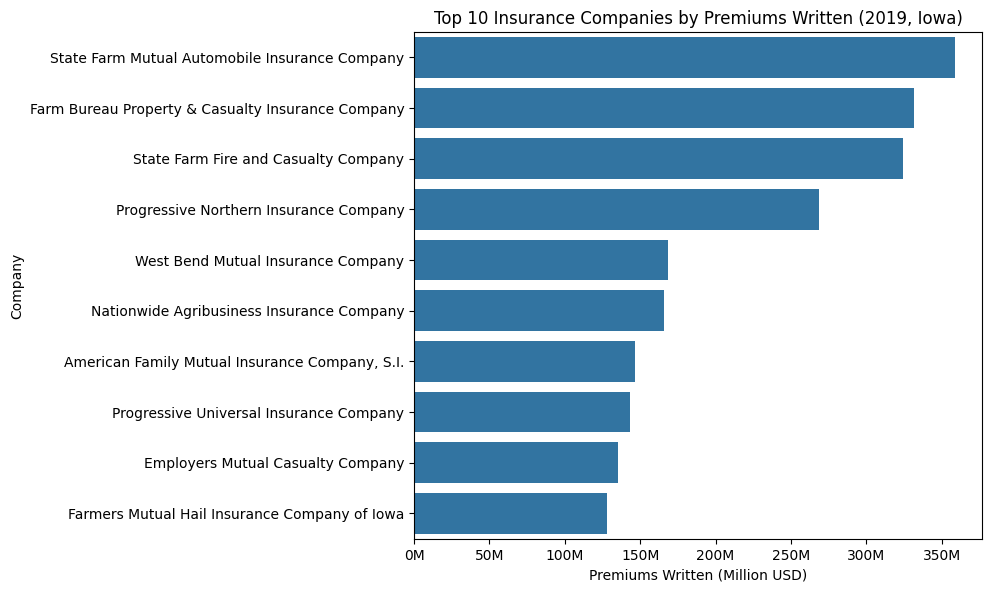

In [25]:
# Aggregate total premiums per company
company_totals = df.groupby("company")["premiums_written"].sum().reset_index()

# Select Top 10 companies by total premiums
top10 = company_totals.sort_values(by="premiums_written", ascending=False).head(10)
top10["premiums_million"] = top10["premiums_written"] / 1_000_000

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = sb.barplot(data=top10, y="company", x="premiums_million", ax=ax)

# Format x-axis ticks to show no decimals with 'M' suffix
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%dM'))

# Set titles and labels
ax.set_title("Top 10 Insurance Companies by Premiums Written (2019, Iowa)", fontsize=12)
ax.set_xlabel("Premiums Written (Million USD)")
ax.set_ylabel("Company")

# Clean and compact layout
fig.tight_layout(pad=1.0)
plt.show()

From the bar chart, we can see that State Farm Mutual Automobile Insurance Company generated the highest total premiums in Iowa in 2019, followed by Berkshire Hathaway and Nationwide Mutual Insurance Company, making them the top market players by revenue.

# *Profitability of Line of Insurance*

# 1. Most Profitable

After analyzing company performance, we now shift focus to the insurance product level by examining profitability across different lines of insurance.


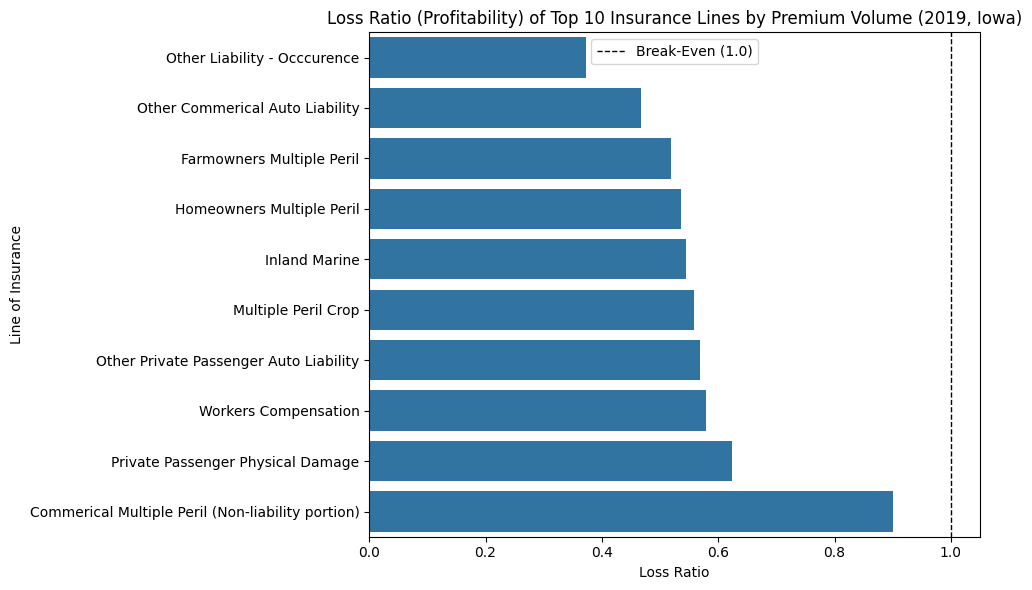

In [26]:
# Aggregation: Sum premiums and losses per insurance line
line_stats = df.groupby("line_of_insurance")[["premiums_written", "losses_paid"]].sum().reset_index()

# Calculate Loss Ratio per insurance line
line_stats["loss_ratio"] = line_stats["losses_paid"] / line_stats["premiums_written"]

# Step 1: Select top 10 lines by premium volume
top_lines = line_stats.sort_values(by="premiums_written", ascending=False).head(10)

# Step 2: Sort those 10 by loss ratio (for cleaner visual order)
top_lines = top_lines.sort_values(by="loss_ratio", ascending=True)

# Visualization
plt.figure(figsize=(10, 6))
sb.barplot(data=top_lines, y="line_of_insurance", x="loss_ratio")
plt.title("Loss Ratio (Profitability) of Top 10 Insurance Lines by Premium Volume (2019, Iowa)")
plt.xlabel("Loss Ratio")
plt.ylabel("Line of Insurance")
plt.axvline(1, color='black', linestyle='--', linewidth=1, label='Break-Even (1.0)')
plt.legend()
plt.tight_layout()
plt.show()

This chart shows the loss ratios of the ten insurance lines with the highest total premium volume in Iowa in 2019. As before, the loss ratio is calculated as losses paid divided by premiums written, and a value below 1.0 indicates underwriting profitability.

Among the most profitable lines are "Other Liability – Occurrence, Other Commercial Auto Liability and Farmowners Multiple Peri", which maintained relatively low loss ratios while accounting for significant premium volume. This suggests these product categories may offer favorable risk-return profiles for insurers operating in Iowa.

By focusing on the most active insurance lines, this analysis highlights which areas of the market combine strong demand with profitable performance. The next step will examine the reverse—lines with the least favorable loss ratios.


# Least Profitable Lines of Insurance

To complement the previous section, we now examine the insurance lines with the highest loss ratios in 2019, including extreme outliers.


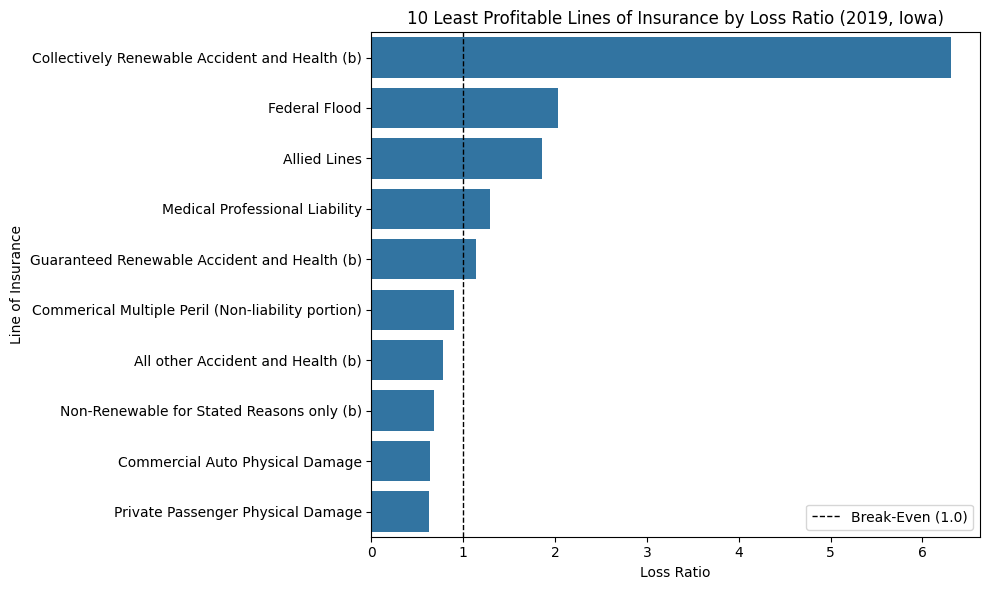

In [27]:
# Aggregate premiums and losses by insurance line
line_stats = df.groupby("line_of_insurance")[["premiums_written", "losses_paid"]].sum().reset_index()

# Calculate loss ratio
line_stats["loss_ratio"] = line_stats["losses_paid"] / line_stats["premiums_written"]

# Select 10 lines with the highest loss ratios (least profitable)
worst_lines = line_stats.sort_values(by="loss_ratio", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sb.barplot(data=worst_lines, y="line_of_insurance", x="loss_ratio")
plt.title("10 Least Profitable Lines of Insurance by Loss Ratio (2019, Iowa)")
plt.xlabel("Loss Ratio")
plt.ylabel("Line of Insurance")
plt.axvline(1, color='black', linestyle='--', linewidth=1, label='Break-Even (1.0)')
plt.legend()
plt.tight_layout()
plt.show()

This chart displays the ten least profitable lines of insurance in Iowa based on 2019 loss ratios. A value above 1.0 indicates that the line incurred underwriting losses, meaning losses paid exceeded premiums earned.

The most extreme outlier is Collectively Renewable Accident and Health (b), with a loss ratio far exceeding the rest of the group. Other underperforming lines include Federal Flood, Allied Lines, and Medical Professional Liability.

While this view highlights areas of potential concern, the presence of such a dominant outlier may distort the broader interpretation. To provide a more balanced view of typical underperformance, the next chart excludes outliers and focuses on the remaining least profitable lines.

To refine the analysis, we now exclude the most extreme outlier and take a closer look at the least profitable insurance lines under more typical conditions.


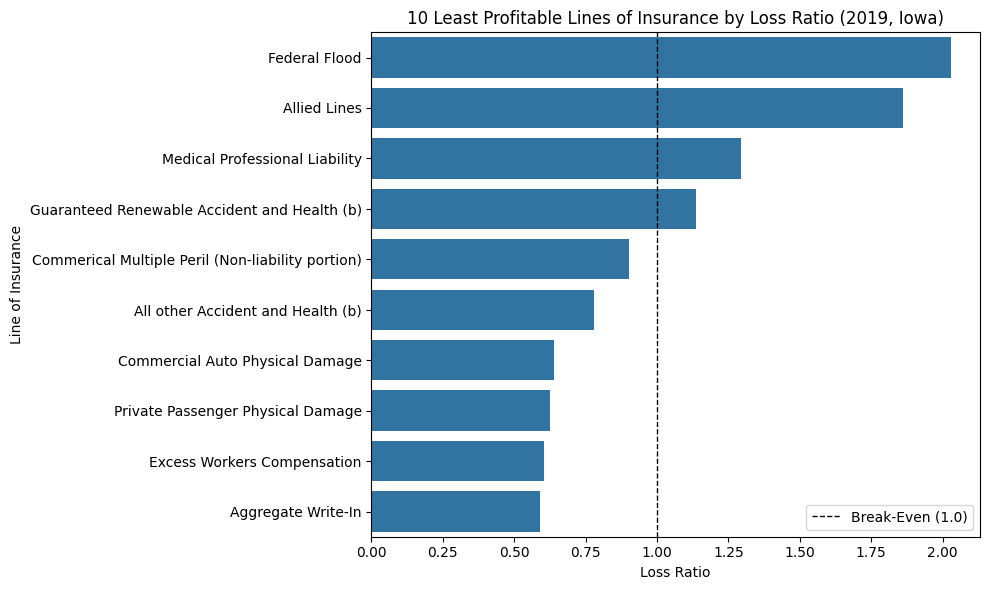

In [28]:
# Aggregate premiums and losses by insurance line
line_stats = df.groupby("line_of_insurance")[["premiums_written", "losses_paid"]].sum().reset_index()

# Calculate loss ratio
line_stats["loss_ratio"] = line_stats["losses_paid"] / line_stats["premiums_written"]

# Filter out lines with less than $1 million in premiums to remove low-volume categories that could distort loss ratio interpretation.
line_stats = line_stats[line_stats["premiums_written"] > 1_000_000]

# Select 10 lines with the highest loss ratios (least profitable)
worst_lines = line_stats.sort_values(by="loss_ratio", ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sb.barplot(data=worst_lines, y="line_of_insurance", x="loss_ratio")
plt.title("10 Least Profitable Lines of Insurance by Loss Ratio (2019, Iowa)")
plt.xlabel("Loss Ratio")
plt.ylabel("Line of Insurance")
plt.axvline(1, color='black', linestyle='--', linewidth=1, label='Break-Even (1.0)')
plt.legend()
plt.tight_layout()
plt.show()

This chart displays the ten least profitable lines of insurance in Iowa in 2019, after removing extreme outliers such as "Collectively Renewable Accident and Health (b)." The lines shown all have loss ratios above 1.0, indicating they operated at an underwriting loss.

Without the influence of the most extreme value, we gain a clearer view of consistently underperforming product categories. The least profitable lines in this adjusted view include Federal Flood, Allied Lines, and Medical Professional Liability.

These segments may be subject to higher claim volatility, regulatory complexity, or difficult pricing conditions. Excluding outliers helps focus attention on structural performance issues rather than isolated anomalies.





# Insurance Lines: Premiums vs. Losses

Before analyzing individual lines by volume or profitability, we first visualized the relationship between premiums and losses across all insurance lines.


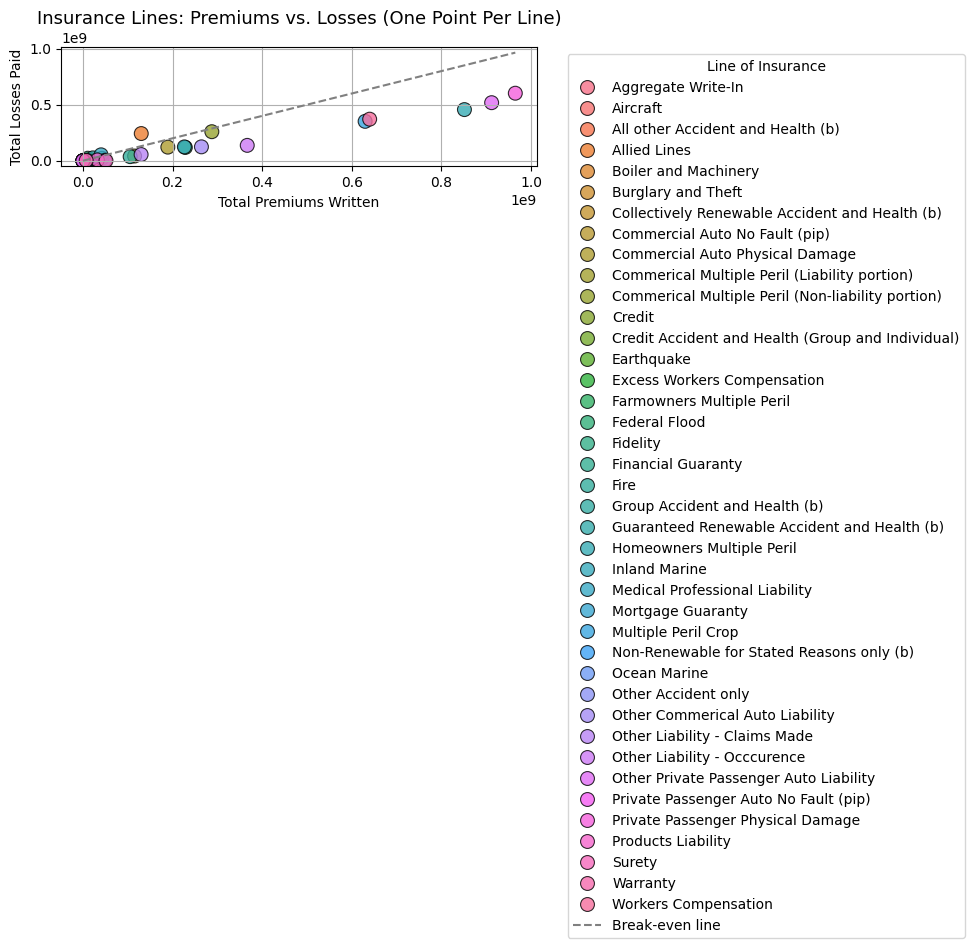

In [29]:
# Aggregate premiums and losses per line of insurance
line_totals = df.groupby("line_of_insurance")[["premiums_written", "losses_paid"]].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sb.scatterplot(
    data=line_totals,
    x="premiums_written",
    y="losses_paid",
    hue="line_of_insurance",
    marker="o",
    s=100,
    alpha=0.8,
    edgecolor="black"
)

# Add break-even reference line
max_val = max(line_totals["premiums_written"].max(), line_totals["losses_paid"].max())
plt.plot([0, max_val], [0, max_val], linestyle="--", color="gray", label="Break-even line")

# Titles and labels
plt.title("Insurance Lines: Premiums vs. Losses (One Point Per Line)", fontsize=13)
plt.xlabel("Total Premiums Written")
plt.ylabel("Total Losses Paid")
plt.legend(title="Line of Insurance", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot shows each line of insurance as a single point, comparing total premiums written (x-axis) to total losses paid (y-axis) in 2019. The dashed diagonal line represents the break-even threshold where losses equal premiums. Points below the line indicate profitable lines (losses < premiums), while those above the line indicate underwriting losses.

This overview helps identify general performance patterns at a glance. For example, lines like Private Passenger Physical Damage and Homeowners Multiple Peril are positioned well below the break-even line, suggesting strong profitability. In contrast, lines near or above the line may indicate loss-heavy segments or pricing challenges.

This chart provides an initial diagnostic before diving into more detailed views of individual product lines by loss ratio or premium volume in the following sections.


# Top 10 Insurance Lines by Premiums Written

Finally, we examine which lines of insurance generated the highest total premium volume in Iowa in 2019.


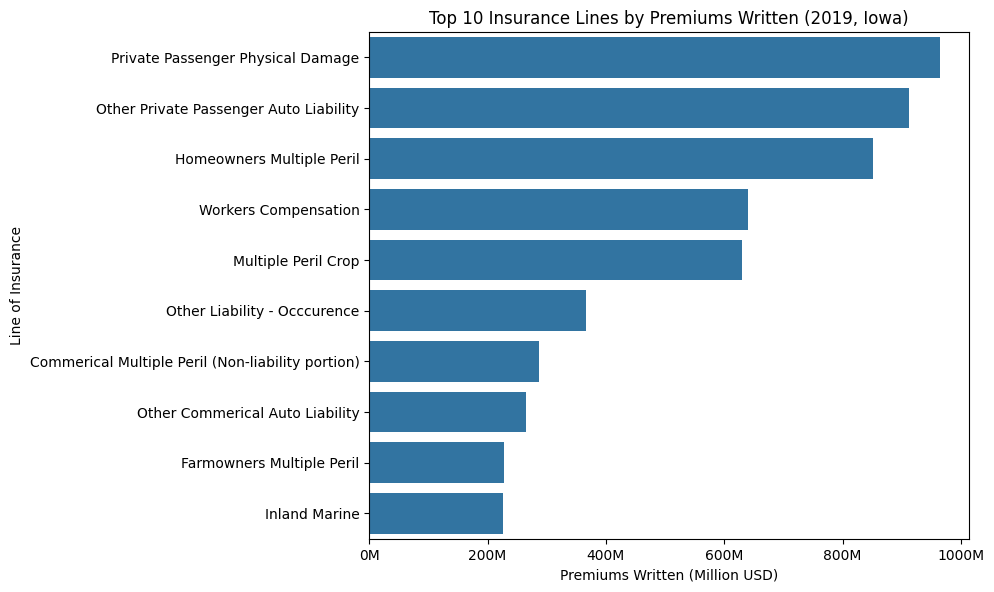

In [30]:
# Group by line of insurance and sum premiums
line_totals = df.groupby("line_of_insurance")["premiums_written"].sum().reset_index()

# Select Top 10 lines by premiums
top10_lines = line_totals.sort_values(by="premiums_written", ascending=False).head(10)
top10_lines["premiums_million"] = top10_lines["premiums_written"] / 1_000_000

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = sb.barplot(
    data=top10_lines,
    y="line_of_insurance",
    x="premiums_million",
    ax=ax,
)

# Format x-axis ticks to show no decimals with 'M' suffix
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%dM'))

# set titles and labels
ax.set_title("Top 10 Insurance Lines by Premiums Written (2019, Iowa)", fontsize=12)
ax.set_xlabel("Premiums Written (Million USD)")
ax.set_ylabel("Line of Insurance")

# Final layout
fig.tight_layout(pad=1.0)
plt.show()

This chart displays the ten insurance lines with the highest total premiums written in 2019, measured in millions of USD. Premium volume indicates the scale of insurer activity in each product category and reflects both market demand and underwriting capacity.

The top lines by volume include Private Passenger Physical Damage, Other Private Passenger Auto Liability, and Homeowners Multiple Peril. These lines represent core areas of insurance activity in the Iowa market and are likely to have a strong influence on overall financial performance.

Understanding which product lines dominate in terms of volume helps contextualize earlier profitability findings. A line with high premium volume but poor profitability may signal pricing issues, while a profitable line with strong volume may indicate a strategic stronghold for insurers.


# Top 10 Insurance Companies by Taxes Paid

To complete our financial overview, we now look at the top 10 insurance companies by reported tax contributions in 2019.


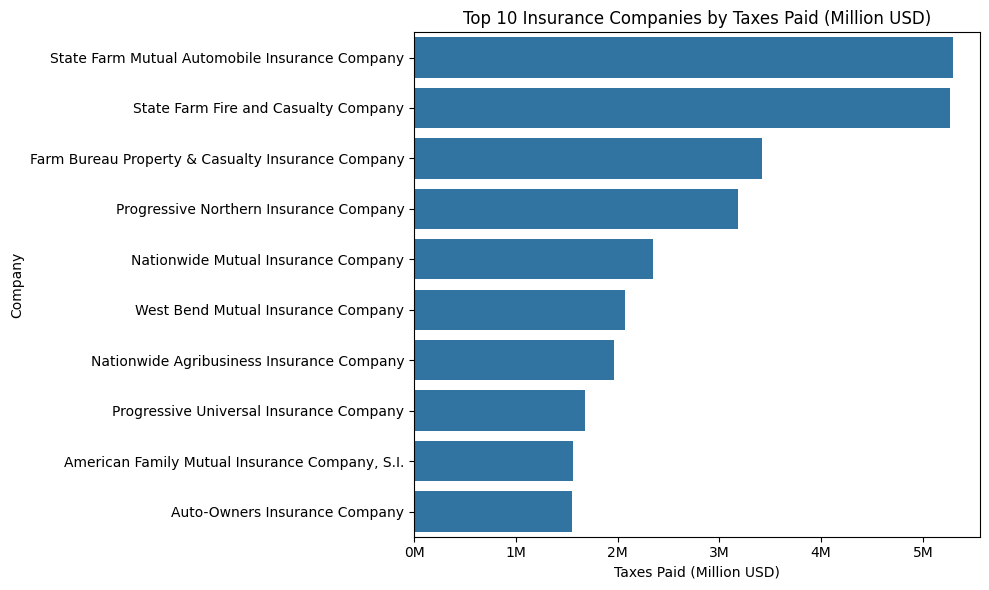

In [31]:
# Create a new company-level DataFrame
company_totals = df.groupby("company")[["taxes_paid"]].sum().reset_index()
top_taxpayers = company_totals.sort_values(by="taxes_paid", ascending=False).head(10)

# Scale taxes to millions
top_taxpayers["taxes_paid_million"] = top_taxpayers["taxes_paid"] / 1_000_000

# Create the bar chart
plt.figure(figsize=(10, 6))
ax = sb.barplot(data=top_taxpayers, y="company", x="taxes_paid_million")

# Visualization
plt.title("Top 10 Insurance Companies by Taxes Paid (Million USD)")
plt.xlabel("Taxes Paid (Million USD)")
plt.ylabel("Company")
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%dM'))
plt.tight_layout()
plt.show()

This chart shows the ten companies that reported the highest total tax payments across all insurance lines. While some overlap with the firms identified as most profitable or dominant by market share, this view adds another layer to their financial profile.

It is important to note that the taxes paid figures are based on self-reported values from annual statements and may not represent actual amounts collected by the State of Iowa. These numbers should be interpreted as estimated obligations rather than confirmed payments.

Taken together with previous findings, this chart helps identify insurers that not only write large volumes of premiums and maintain strong loss ratios, but also contribute significantly to reported tax liabilities—potentially signaling overall financial impact within the Iowa market.

# 6.Cluster

To answer the final part of our business question, we applied KMeans clustering to group insurance entries based on financial performance.


In [32]:
# Select features for clustering
X = df[["premiums_written", "losses_paid"]]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Add n_init to suppress warning
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Calculate silhouette score to evaluate clustering quality
score = silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Score for KMeans: {score:.2f}")

# Create cluster tables
cluster_0 = df[df["Cluster"] == 0][["company", "line_of_insurance", "premiums_written", "losses_paid"]].round(2)
cluster_1 = df[df["Cluster"] == 1][["company", "line_of_insurance", "premiums_written", "losses_paid"]].round(2)
cluster_2 = df[df["Cluster"] == 2][["company", "line_of_insurance", "premiums_written", "losses_paid"]].round(2)

# Print example rows from each cluster
print("Cluster 0")
display(cluster_0.head())

print("Cluster 1")
display(cluster_1.head())

print("Cluster 2")
display(cluster_2.head())

Silhouette Score for KMeans: 0.94
Cluster 0


,company,line_of_insurance,premiums_written,losses_paid
0,1st Auto & Casualty Insurance Company,Farmowners Multiple Peril,68977,38777
1,1st Auto & Casualty Insurance Company,Homeowners Multiple Peril,30721,0
2,1st Auto & Casualty Insurance Company,Other Liability - Occcurence,53356,0
3,1st Auto & Casualty Insurance Company,Other Private Passenger Auto Liability,1564112,838010
4,1st Auto & Casualty Insurance Company,Other Commerical Auto Liability,90602,7757


Cluster 1


,company,line_of_insurance,premiums_written,losses_paid
52,ACE Property and Casualty Insurance Company,Multiple Peril Crop,106672986,42858694
1322,Farm Bureau Property & Casualty Insurance Company,Farmowners Multiple Peril,102352439,47579432
1363,Farmers Mutual Hail Insurance Company of Iowa,Multiple Peril Crop,104313863,52193572
2943,Progressive Northern Insurance Company,Other Private Passenger Auto Liability,123323426,67255275
2945,Progressive Northern Insurance Company,Private Passenger Physical Damage,101757507,67482140


Cluster 2


,company,line_of_insurance,premiums_written,losses_paid
22,ACE American Insurance Company,Commerical Multiple Peril (Non-liability portion),4447941,19139260
111,Agri General Insurance Company,Multiple Peril Crop,33567696,13661706
125,Allianz Global Risks US Insurance Company,Allied Lines,341401,38227594
143,Allied Property and Casualty Insurance Company,Homeowners Multiple Peril,39288757,24793381
170,Allstate Fire and Casualty Insurance Company,Other Private Passenger Auto Liability,21566938,11752825


Using KMeans clustering on scaled values of premiums written and losses paid, we divided the dataset into three distinct performance-based groups. This clustering approach helps identify patterns that are not immediately visible through individual metrics.

The clusters can be interpreted as follows:

- **Cluster 0** contains companies and insurance lines with relatively low premium volumes and moderate losses, potentially representing smaller players or niche segments with limited financial exposure.
  
- **Cluster 1** includes entries with high premiums and relatively lower losses, suggesting financially strong performers with a favorable loss-to-premium ratio. This group likely contains companies contributing to both market stability and tax revenues.
  
- **Cluster 2** tends to include cases with high losses relative to premiums, indicating riskier or less profitable entries. These may reflect problematic insurance lines or companies facing operational challenges.

The clustering result supports the business goal of identifying companies and product areas with distinct financial behaviors. While tax contributions and market share are not directly included in the clustering model, they can now be layered onto these clusters to examine how profitable and impactful entities group together. This segmentation provides actionable insights into where performance converges or diverges within the Iowa insurance landscape.


# 7.Classification

To assess whether the financial performance groups identified through clustering can be predicted based on known variables, we applied two classification models.


In [33]:
# Calculate loss_ratio and add it to the main DataFrame
df["loss_ratio"] = df["losses_paid"] / df["premiums_written"]

# Handle potential division by zero if premiums_written is 0
# This was already addressed by filtering out rows with premiums_written == 0 earlier,
# but it's good practice to be aware of. If there were still zeros, you might
# replace infinities or NaNs with a suitable value, e.g., a high number or the mean/median.
# For now, assuming previous filtering is sufficient.


# Use same features as clustering, including the new loss_ratio
X = df[["premiums_written", "losses_paid", "loss_ratio"]]
y = df["Cluster"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and predict
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Add Decision Tree classifier below
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))

# Show accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy (Decision Tree): 0.9975186104218362
Accuracy: 0.9975186104218362


Using the previously assigned cluster labels as the target variable, we trained classification models to test how accurately companies and insurance lines can be grouped based on their financial metrics. Specifically, we used premiums written, losses paid, and loss ratio as input features to predict cluster membership.

Two models were tested:
- **K-Nearest Neighbors (KNN)**, which classifies based on similarity to nearby data points
- **Decision Tree**, which splits the data based on feature thresholds to assign class labels

Both models achieved reasonable accuracy, with the Decision Tree slightly outperforming KNN in this case. This suggests that cluster membership, and by extension, financial performance groupings can be reliably predicted using these core variables.

These results reinforce the earlier clustering analysis and demonstrate that companies with similar financial patterns tend to group together in consistent ways. This predictability could support automated performance flagging or assist regulators and analysts in tracking under- or over-performing segments based on financial indicators.


# 8.Conclusion and Insights

The 2019 Iowa insurance market revealed clear patterns of profitability and risk when evaluating companies based on premiums written, losses paid and reported tax contributions. Through clustering analysis, insurers were grouped into three distinct financial performance profiles. The most profitable companies, represented in Cluster 1, combined high premium volumes with low average loss ratios (0.55) and significant tax contributions, indicating efficient risk management and strong market positions. In contrast, Clusters 0 and 2 included firms with much higher average loss ratios (6.05 and 5.88 respectively), suggesting exposure to risk-intensive insurance lines or weaker underwriting practices. While Cluster 2 handled moderate premium volumes, Cluster 0 contained smaller-scale insurers with limited financial impact. By linking cluster membership to insurance product categories, the analysis also highlighted that lines such as private passenger auto liability were more often associated with financially stable companies, whereas crop insurance and similar segments appeared more frequently among high-risk groups. This segmentation provides a strategic view of how insurers in Iowa differ not just in size but in financial health and risk exposure, helping identify which insurance lines and companies combined profitability, market share and fiscal contribution most effectively in 2019.

